<a href="https://colab.research.google.com/github/nitinmalviya326/deep-learning-lab/blob/main/dl_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear separable data**


In [12]:
#import library
from sklearn.datasets import make_classification
import numpy as np
#library for visualization
import matplotlib.pyplot as plt


In [13]:
#linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

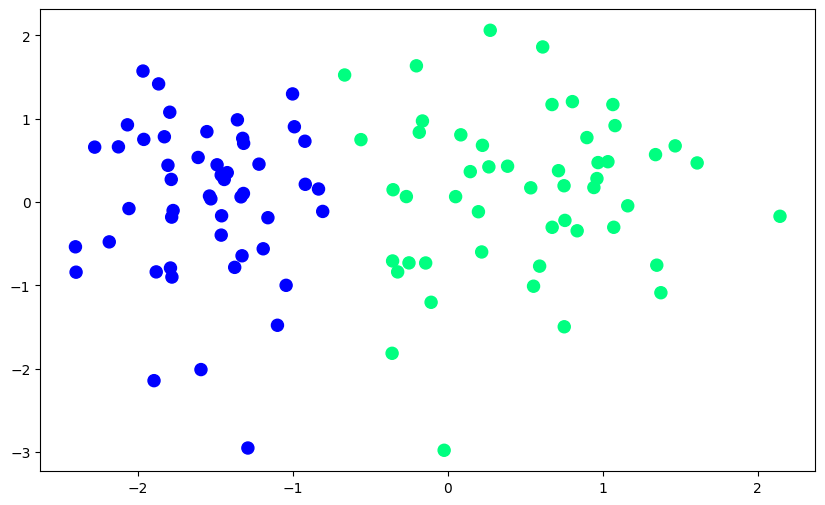

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=75)

In [15]:
def perceptron(X,y):
    #adding one new column such that it can be multiplied with the bias term
    X = np.insert(X,0,1,axis=1)
    #intializing weights with all ones initially
    weights = np.ones(X.shape[1])
    #initializing learning rate
    lr = 0.1

    #percpetron trick -> perceptron learning algo
    for i in range(1000):
        #choosing any random student
        j = np.random.randint(0,100)
        #predicting the outout
        y_hat = step(np.dot(X[j],weights))
        #weight updation
        weights = weights + lr*(y[j]-y_hat)*X[j]

    #returning bias and weights (intecept and coefficients)
    return weights[0],weights[1:]


In [16]:
def step(z):
    return 1 if z>0 else 0

In [17]:
intercept_,coef_ = perceptron(X,y)

In [18]:
print(coef_)
print(intercept_)

[1.31556128 0.19688421]
0.9


In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

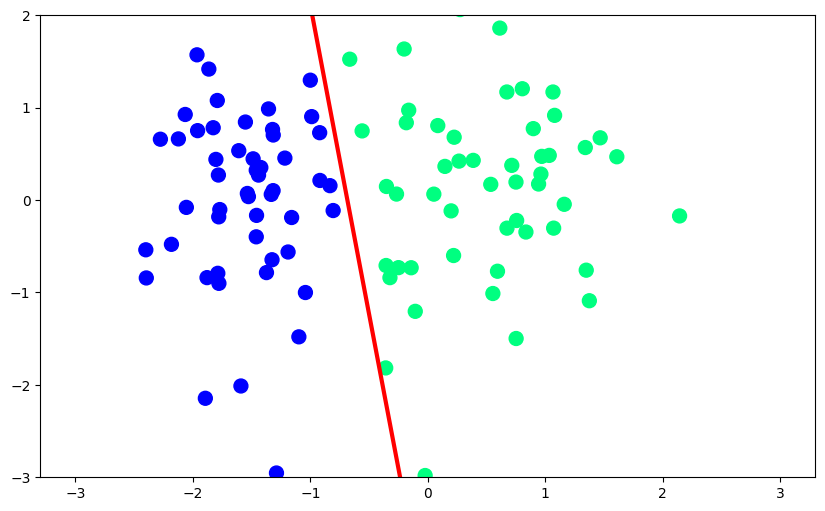

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

**Non linear separable data**

In [22]:
import numpy as np
import pandas as pd

In [23]:
#non-linear separable data
df = pd.DataFrame([[4,4,1],[8,8,1],[4,8,0],[8,4,0]], columns=['cgpa', 'profile_score', 'placed'])

In [24]:
df.head()

,cgpa,profile_score,placed
0,4,4,1
1,8,8,1
2,4,8,0
3,8,4,0


In [25]:
#a function that takes architecture of NN as input (eg [2,2,2]->2 input neuron, 2 hl neron and 1 output neuron)
#functionality-> return the initialized weights and bias (for given input -> 9 (wts and biases) values would be returned by it)
#return weights and biases in 2d numpy array
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [26]:
# Utility Functions
#activation function sigmoid for each neurons
def sigmoid(Z):

  A = 1/(1+np.exp(-Z))

  return A

In [27]:
#this function calculate just the output of any neuron
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)

  return A

In [28]:
# L-layer feed forward
#function for forward propagation with returning -> A=predicted output and A_prev=predicted output of hidden neurons
#these values will be needed during calculation of derivatives in backpropagation algorithm

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev

In [29]:
#updating all the 9 (weights and biases) parameters

def update_parameters(parameters,y,y_hat,A1,X):
  lr=0.001
  parameters['W2'][0][0] = parameters['W2'][0][0] + (lr * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (lr * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (lr * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (lr * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (lr * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (lr * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (lr * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (lr * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (lr * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [30]:
#calculating loss for 1st data point or student or 1st row

X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

#using binary cross entropy as loss function
print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.626528170117084


{'W1': array([[0.10003996, 0.10003996],
        [0.10003996, 0.10003996]]),
 'b1': array([[9.99068198e-06],
        [9.99068198e-06]]),
 'W2': array([[0.10032122],
        [0.10032122]]),
 'b2': array([[0.10078678]])}

In [31]:
##calculating loss for 2nd data point or student or 2nd row

X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.5682097511151805


{'W1': array([[0.10008874, 0.10008874],
        [0.10008874, 0.10008874]]),
 'b1': array([[1.60875819e-05],
        [1.60875819e-05]]),
 'W2': array([[0.10068191],
        [0.10068191]]),
 'b2': array([[0.10111537]])}

In [32]:
##calculating loss for 3rd data point or student or 3rd row

X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8292645819583053


{'W1': array([[0.10004855, 0.10000837],
        [0.10004855, 0.10000837]]),
 'b1': array([[6.04182456e-06],
        [6.04182456e-06]]),
 'W2': array([[0.10024864],
        [0.10024864]]),
 'b2': array([[0.09968501]])}

In [33]:
##calculating loss for 4th data point or student or 4th row

X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8280687544449228


{'W1': array([[0.09996859, 0.09996839],
        [0.09996857, 0.09996838]]),
 'b1': array([[-3.95393799e-06],
        [-3.95653230e-06]]),
 'W2': array([[0.09981582],
        [0.09981586]]),
 'b2': array([[0.09925276]])}

In [34]:
# we have seen loss for each student for 1st epoch, now instead of that we apply loop for further epochs and see the average loss
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.713017814408873
Epoch -  2 Loss -  0.7017153807157985
Epoch -  3 Loss -  0.7016816053562838
Epoch -  4 Loss -  0.7016479728025896
Epoch -  5 Loss -  0.7016144824067421
Epoch -  6 Loss -  0.7015811335239883
Epoch -  7 Loss -  0.7015479255127792
Epoch -  8 Loss -  0.7015148577347529
Epoch -  9 Loss -  0.7014819295547157
Epoch -  10 Loss -  0.7014491403406267
Epoch -  11 Loss -  0.7014164894635789
Epoch -  12 Loss -  0.7013839762977842
Epoch -  13 Loss -  0.7013516002205542
Epoch -  14 Loss -  0.701319360612285
Epoch -  15 Loss -  0.70128725685644
Epoch -  16 Loss -  0.7012552883395328
Epoch -  17 Loss -  0.7012234544511113
Epoch -  18 Loss -  0.7011917545837411
Epoch -  19 Loss -  0.7011601881329885
Epoch -  20 Loss -  0.7011287544974053
Epoch -  21 Loss -  0.7010974530785116
Epoch -  22 Loss -  0.7010662832807804
Epoch -  23 Loss -  0.7010352445116215
Epoch -  24 Loss -  0.7010043361813654
Epoch -  25 Loss -  0.7009735577032473
Epoch -  26 Loss -  0.7009429084933924

{'W1': array([[0.09846063, 0.09845074],
        [0.09845965, 0.09845022]]),
 'b1': array([[-0.00020401],
        [-0.00020413]]),
 'W2': array([[0.09045029],
        [0.09045274]]),
 'b2': array([[0.08989564]])}